In [2]:
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.model_selection import train_test_split 
# if this doesn't work, try: from sklearn.cross_validation import train_test_split

In [6]:
text_pos = []
labels_pos = []
with open("textsample1.txt") as f:
    for i in f: 
        text_pos.append(i) 
        labels_pos.append('pos')

text_neg = []
labels_neg = []
with open("textsample2.txt") as f:
    for i in f: 
        text_neg.append(i)
        labels_neg.append('neg')

In [7]:
training_text = text_pos[:int((.8)*len(text_pos))] + text_neg[:int((.8)*len(text_neg))]
training_labels = labels_pos[:int((.8)*len(labels_pos))] + labels_neg[:int((.8)*len(labels_neg))]

test_text = text_pos[int((.2)*len(text_pos)):] + text_neg[int((.2)*len(text_neg)):]
test_labels = labels_pos[int((.2)*len(labels_pos)):] + labels_neg[int((.2)*len(labels_neg)):]

In [8]:
vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    max_features = 85
)

In [9]:
features = vectorizer.fit_transform(
    training_text + test_text)

features_nd = features.toarray() # for easy use

In [10]:
x_train, x_test, y_train, y_test  = train_test_split(
        features_nd[0:len(training_text)], 
        training_labels,
        train_size=0.80, 
        random_state=1234)

In [11]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [12]:
log_model = log_model.fit(x_train, y_train)

In [13]:
test_pred = log_model.predict(x_test)

In [14]:
import random
sample1 = random.sample(range(len(test_pred)), 10)
for text, sentiment in zip(test_text, test_pred[sample1]):
    print (sentiment, text)

pos 1	I wanted desperately to love'The Da Vinci Code as a film.

pos 1	The Da Vinci Code was awesome, I can't wait to read it...

pos 1	The Da Vinci Code was absolutely AWESOME!

pos 1	da vinci code was an awesome movie...

neg 1	DA VINCI CODE IS AWESOME!!

pos 1	I love The Da Vinci Code...

pos 1	The Da Vinci Code is awesome..

neg 1	The Da Vinci Code is awesome!!

neg 1	Love luv lubb the Da Vinci Code!

pos 1	the people who are worth it know how much i love the da vinci code.



In [15]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, test_pred))

0.9551056338028169


In [16]:
import nltk
nltk.download('punkt')

def format_sentence(sent):
    return({word: True for word in nltk.word_tokenize(sent)})

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [17]:
print(format_sentence("The Da Vinci Code is awesome"))

{'The': True, 'Da': True, 'Vinci': True, 'Code': True, 'is': True, 'awesome': True}


In [18]:
import io
pos = []
with io.open("textsample1.txt") as f:
    for i in f: 
        pos.append([format_sentence(i), 'pos'])

neg = []
with io.open("textsample2.txt") as  f:
    for i in f: 
        neg.append([format_sentence(i), 'neg'])

In [19]:
training = pos[:int((.8)*len(pos))] + neg[:int((.8)*len(neg))]
test = pos[int((.2)*len(pos)):] + neg[int((.2)*len(neg)):]

In [20]:
from nltk.classify import NaiveBayesClassifier

classifier = NaiveBayesClassifier.train(training)

In [21]:
classifier.show_most_informative_features()

Most Informative Features
                       0 = None              pos : neg    =    381.2 : 1.0
                       1 = True              pos : neg    =    381.2 : 1.0
                  sucked = True              neg : pos    =    362.2 : 1.0
                 awesome = True              pos : neg    =    182.8 : 1.0
                 AWESOME = True              pos : neg    =    142.1 : 1.0
                     guy = True              neg : pos    =    140.0 : 1.0
                    hate = True              neg : pos    =    108.6 : 1.0
                    love = True              pos : neg    =     81.6 : 1.0
                  person = True              neg : pos    =     73.7 : 1.0
                  around = True              neg : pos    =     71.1 : 1.0


In [22]:
ex1 = "The Da Vinci Code is awesome!"

print(classifier.classify(format_sentence(ex1)))

pos


In [23]:
ex2 = "I'm sad that Twilio doesn't have even more blog posts!"

print(classifier.classify(format_sentence(ex2)))

neg


In [24]:
from nltk.classify.util import accuracy
print(accuracy(classifier, test))

0.9987676056338028


In [25]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
filetext1 = []
with open("textsample1.txt") as f:
    for i in f:
        filetext1.append(i) 

words1 = nltk.word_tokenize(str(filetext1))

filetext2 = []
with open("textsample2.txt") as f:
    for i in f:
        filetext2.append(i) 

words2 = nltk.word_tokenize(str(filetext2))

In [27]:
default_stopwords = stopwords.words('english')
default_stopwords.extend(['...','\'re','n\'t','\'the','\'this','\'it','n\'',
                         'it\\','\'1\\ti','\'0\\ti','\'0\\tda','.\\n','..\\n',
                         '1\\ti','\'1\\tthe'])

In [28]:
# Remove single-character tokens (mostly punctuation)
words_1 = [word for word in words1 if len(word) > 2]
words_2 = [word for word in words2 if len(word) > 2]

# Remove numbers
# words = [word for word in words if not word.isnumeric()]

# Lowercase all words (default_stopwords are lowercase too)
words_11 = [word.lower() for word in words_1]
words_22 = [word.lower() for word in words_2]

# Stemming words seems to make matters worse, disabled
# stemmer = nltk.stem.snowball.SnowballStemmer('german')
# words = [stemmer.stem(word) for word in words]

# Remove stopwords
words11 = [word for word in words_11 if word not in default_stopwords]
words22 = [word for word in words_22 if word not in default_stopwords]

In [29]:
# Calculate frequency distribution
fdist1 = nltk.FreqDist(words11)

# Output top 10 words for each of the text sample.

print("The firt frequency distribution")
for word, frequency in fdist1.most_common(10):
    print(u'{};{}'.format(word, frequency))
    
print("The second frequency distribution")
fdist2 = nltk.FreqDist(words22)

for word, frequency in fdist2.most_common(10):
    print(u'{};{}'.format(word, frequency))   

The firt frequency distribution
love;1446
vinci;1000
harry;986
like;950
awesome;894
code;888
impossible;828
mountain;793
mission;776
brokeback;711
The second frequency distribution
vinci;1003
code;975
mountain;906
harry;894
potter;795
brokeback;776
hate;571
sucked;484
sucks;405
movie;374


In [30]:
import pip
pip.main(['install', '--user', 'wordcloud'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

In [31]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(width=1000, height=600, background_color='white')
wordcloud.generate_from_frequencies(frequencies=fdist1)

(-0.5, 999.5, 599.5, -0.5)

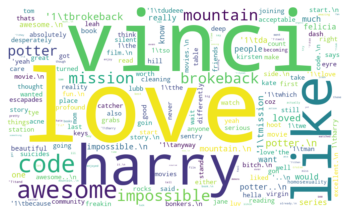

In [32]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 999.5, 599.5, -0.5)

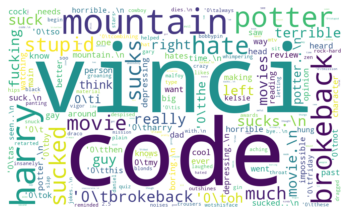

In [33]:
wordcloud = WordCloud(width=1000, height=600, background_color='white')
wordcloud.generate_from_frequencies(frequencies=fdist2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [34]:
import random
spl = random.sample(range(len(test_pred)), 1100)
with open("text1_sentiment.txt",'w', encoding= 'utf-8') as f:
    for text, sentiment in zip(test_text, test_pred[spl]):
        value = sentiment+' '+text
        f.write(value)

COMPLETE YOUR ASSIGNMENT QUESTIONS HERE

In [ ]:
1)For each datafile, run the NaiveBayes classifier from the Notebook and report the output whether each document as a whole (i.e., textsample1.txt and textsample2.txt) is classified as positive or negative. [5 points]
Answer: 

Most Informative Features sucked = True neg : pos = 437.2 : 1.0 0 = None 
pos : neg = 381.2 : 1.0 1 = True pos : neg = 381.2 : 1.0 awesome = True 
pos : neg = 212.5 : 1.0 AWESOME = True pos : neg = 143.2 : 1.0 guy = True
neg : pos = 140.0 : 1.0 hate = True neg : pos = 108.6 : 1.0 love = True 
pos : neg = 81.6 : 1.0 person = True neg : pos = 73.7 : 1.0 around = True 
neg : pos = 72.8 : 1.0

It can be observed from the table that the total number of positives > negatives for files 
textsample1.txt and textsample2.txt, hence classified as positive

2)Validate your answer by calculating the frequency of word count as well as visualizing it using wordcloud. [10 points]
Answer:
The firt frequency distribution love:1446 vinci:1000 awesome:992 harry:986 
    like:950 code:891 impossible:829 potter:818 mountain:803 mission:776

The second frequency distribution vinci:1003 code:980 potter:908 mountain:908 
    harry:894 brokeback:776  hate:571 sucked:571

Visualization: The wordcloud has been created for each textsample files above.

3)Explain your analysis based on your results from question 1 and 2. [10 points]
 Answer:- 
 
 For the textsample1.txt the frequency of the words count is calculated and here is the below words represented with number of counts. The love word has repeated maximum times which is 1446. 
 For the textsample2.txt the frequency of the words count is calculated and here is the below words represented with number of counts. 
 The "vinci" word has repeated maximum times which is 1003. The accuracy score was 99.84%.

4)Read “textsample1.txt” and report the sentiment of each line (i.e., each sentence) whether it is positive or negative. Show the Make an additional column in the data frame that shows the sentiment of each sentence. Then, save it as a “text1_sentiment.txt” file 
 Answer:- The code is written in the above block and the text file which is generated has 
          been pushed to git hub and in this file I created additional coloumn for sentiment (positive or negative).

5)Split the data from textsample1.txt into two pieces (80% as the trainset and 20% as the testset, random sampling), and conduct the sentiment analysis model performance test. Report the prediction accuracy and discuss what the accuracy score means in a Markdown block below your scripts. [15 points] 
 Answer:- The Accuracy Score for the two pieces of 80% train and 20% test data 
          with random sampling is provided in the cell number 3 and 11.